In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch04-time-series-visualizer/fcc-forum-pageviews.csv",
              parse_dates=True,
              index_col=0)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB
None
            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [197]:
df1 = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]

In [198]:
# Explicitly copy so that pandas knows that we don't intend to update df. Otherwise you get SettingWithCopyWarning
#df2 = df
df2 = df1.copy()
df2.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [199]:
df2 = df2.resample('M').mean()
df2.head()

,value
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667


In [200]:
df2["year"] = df2.index.year
df2["month"] = df2.index.month
df2.sort_values(by=['year', 'month'])
df2

,value,year,month
date,,,
2016-05-31,19432.400000,2016,5
2016-06-30,21875.105263,2016,6
2016-07-31,24109.678571,2016,7
2016-08-31,31049.193548,2016,8
2016-09-30,41476.866667,2016,9
2016-10-31,27398.322581,2016,10
2016-11-30,40448.633333,2016,11
2016-12-31,27832.419355,2016,12
2017-01-31,32785.161290,2017,1


In [201]:
mm = ['NA', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2.month = df2.month.apply(lambda x: mm[x])
df2.head()

,value,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September


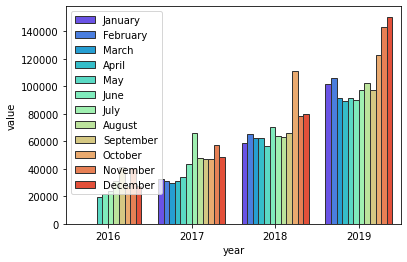

In [214]:
months = ['January', 'February', 'March', 'April', 
          'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']


ax = sns.barplot(x=df2["year"], y=df2.value, data=df2, hue=df2.month, hue_order=months, 
                 edgecolor=".2", palette="rainbow")

ax.legend()
#ax.legend(months, title='Months')

   month  year    value
0      1  2017  1016340
1      1  2018  1815983
2      1  2019  3163752
3      2  2017   871166
4      2  2018  1839012
      month  year    value
0   January  2017  1016340
1   January  2018  1815983
2   January  2019  3163752
3  February  2017   871166
4  February  2018  1839012


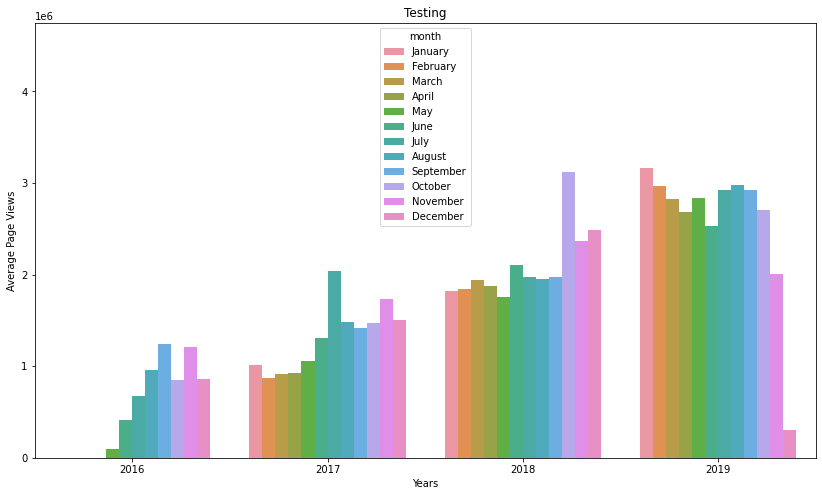

In [135]:
    df = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]    
    df2 = df.copy()
    df2 = df2.reset_index()    
    df2['date'] = pd.to_datetime(df2.date)
    df2["year"] = df2["date"].dt.year
    df2["month"] = df2["date"].dt.month

    #df2["cumValues"] = df2.groupby(["month", "year"]).value.transform('sum')
    #df2 = df2.groupby(["month", "year"]).value.transform('sum')
    df2 = df2.groupby(["month", "year"]).sum().reset_index()
    
    print(df2.head())

    mm = ['NA', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df2.month = df2.month.apply(lambda x: mm[x])

    print(df2.head())

    ax = sns.barplot(x=df2["year"], y=df2.value, data=df2, hue=df2.month)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title("Testing")
    ax.figure.set_size_inches(14,8)

    ax.set_ymargin(.5)

In [139]:
fig = ax.figure
fig.axes[0].get_legend().get_texts()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   44 non-null     object
 1   year    44 non-null     int64 
 2   value   44 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

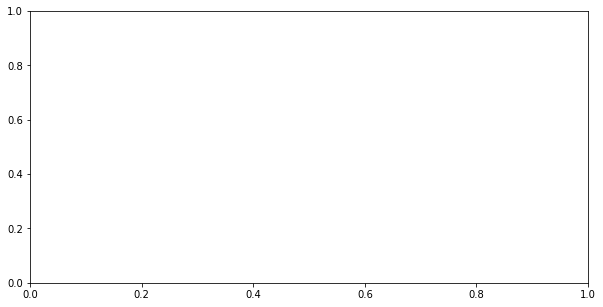

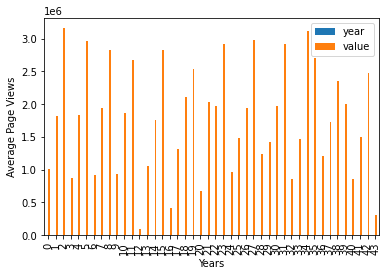

In [147]:
    fig, ax= plt.subplots(figsize=(10,5))
    df2.plot.bar()
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

In [68]:
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset
df2 = df2 [(df2.value >= df2.value.quantile(0.025)) & (df2.value <= df2.value.quantile(0.975))]
df2

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [6]:
# Access a group of rows and columns by index
df2.loc[1294]

date     2019-11-24
value        138875
Name: 1294, dtype: object

In [9]:
# Access a every 3rd rows till 40
df2.loc[:40:3]

,date,value
10,2016-05-19,19736
19,2016-05-28,19044
30,2016-06-08,18072
37,2016-06-15,18584


In [10]:
df2.loc[df2["value"] > 100]

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [11]:
df2[df2["value"] > 100]

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [69]:
#df2['date'] = pd.to_datetime(df2.date, format='%Y-%m-%d')
df2['date'] = pd.to_datetime(df2.date)
df2.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [71]:
df2["year"] = df2["date"].dt.year
df2.head()

,date,value,year
10,2016-05-19,19736,2016
17,2016-05-26,18060,2016
18,2016-05-27,19997,2016
19,2016-05-28,19044,2016
20,2016-05-29,20325,2016


In [72]:
df2["month"] = df2["date"].dt.month
df2.head()

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5


Text(0, 0.5, 'Average Page Views')

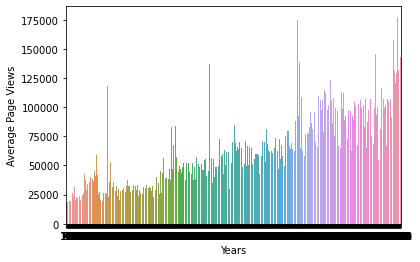

In [73]:
ax = sns.barplot(x=df2.index, y=df2.value, data=df2)
plt.xlabel('Years')
plt.ylabel('Average Page Views')

In [112]:
print(df2.head())
df2.value1 = df2.groupby(["month", "year"]).sum().value
df2.head()

         date  value  year  month
10 2016-05-19  19736  2016      5
17 2016-05-26  18060  2016      5
18 2016-05-27  19997  2016      5
19 2016-05-28  19044  2016      5
20 2016-05-29  20325  2016      5


,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5


In [122]:
# Testing - Group and calulate sum and add it as a new column using transform.
df4 = df2
print(df4.head())
df4["cumValues"] = df4.groupby(["month", "year"]).value.transform('sum')
df4["value"] = df4.groupby(["month", "year"]).value.transform('sum')
print(df4.head())
df4.reset_index()
print(df4.head())

         date    value  year  month  cumValues
10 2016-05-19  2429050  2016      5    2429050
17 2016-05-26  2429050  2016      5    2429050
18 2016-05-27  2429050  2016      5    2429050
19 2016-05-28  2429050  2016      5    2429050
20 2016-05-29  2429050  2016      5    2429050
         date     value  year  month  cumValues
10 2016-05-19  12145250  2016      5   12145250
17 2016-05-26  12145250  2016      5   12145250
18 2016-05-27  12145250  2016      5   12145250
19 2016-05-28  12145250  2016      5   12145250
20 2016-05-29  12145250  2016      5   12145250
         date     value  year  month  cumValues
10 2016-05-19  12145250  2016      5   12145250
17 2016-05-26  12145250  2016      5   12145250
18 2016-05-27  12145250  2016      5   12145250
19 2016-05-28  12145250  2016      5   12145250
20 2016-05-29  12145250  2016      5   12145250


In [101]:
# Flatten the table
df3 = df3.reset_index()
df3.head()

,month,year,value
0,1,2017,1016340
1,1,2018,1815983
2,1,2019,3163752
3,2,2017,871166
4,2,2018,1839012


In [102]:
mm = ['NA', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df3.month = df3.month.apply(lambda x: mm[x])
df3.head()

,month,year,value
0,January,2017,1016340
1,January,2018,1815983
2,January,2019,3163752
3,February,2017,871166
4,February,2018,1839012


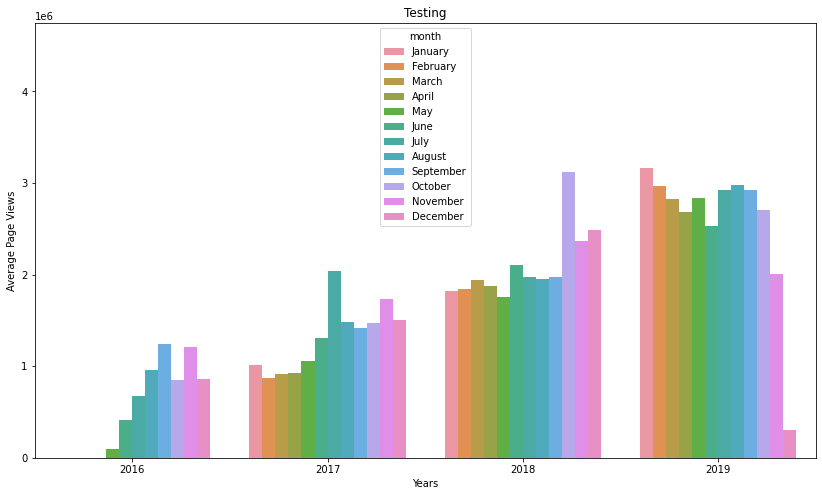

In [103]:
ax = sns.barplot(x=df3["year"], y=df3.value, data=df3, hue=df3.month)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title("Testing")
ax.figure.set_size_inches(14,8)

ax.set_ymargin(.5)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

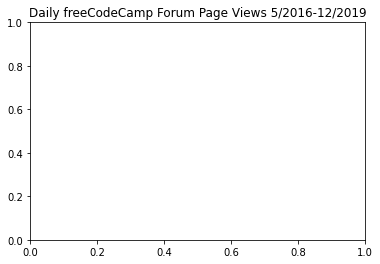

In [16]:

    # Set the title
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

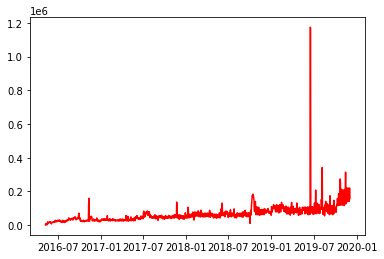

In [10]:
plt.plot(df2.index, df2['value'], color='r')